<p style='text-align: center'><font size= "5"> CCT College Dublin </p></font>

**Module Title:** Machine Learning

**Assessment Title:** CA1: Machine Learning

**Lecturer Name:** Marina Iantorno

**Student Full Name:** Laercio Santos Lima

**Student Number:** 2022055

**Assessment Due Date:** 17/04/2022

**Date of Submission:** 17/04/2022


 
<br><br> 

**Declaration** 
			
<p style='text-align: justify;'>By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.</p>






In [43]:
# Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fast")

In [2]:
# reading the dataset
df = pd.read_csv("used_cars_2020.csv")

# Characteristics of the dataset


In [3]:
# showing the first rows
df.head()

,name,year,selling_price,fuel,km_driven,seller_type,transmission,owner,seats,engine_value,max_power_value,mileage_value
0,Maruti Alto 800 VXI,2020,250999,Petrol,30000,Individual,Manual,First Owner,5,796,47.30,22.05
1,Maruti Celerio X ZXI,2020,250000,Petrol,120000,Individual,Manual,Second Owner,5,998,67.00,21.63
2,Maruti Wagon R LXI,2020,265000,Petrol,70000,Individual,Manual,Second Owner,5,998,67.05,21.79
3,Volkswagen Polo 1.5 TDI Comfortline,2020,260000,Diesel,50000,Individual,Manual,First Owner,5,1498,88.50,20.14
4,Maruti Alto 800 LXI,2020,350000,Petrol,5000,Individual,Manual,First Owner,5,796,47.30,22.05


In [4]:
# Showing some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6353 non-null   object 
 1   year             6353 non-null   int64  
 2   selling_price    6353 non-null   int64  
 3   fuel             6353 non-null   object 
 4   km_driven        6353 non-null   int64  
 5   seller_type      6353 non-null   object 
 6   transmission     6353 non-null   object 
 7   owner            6353 non-null   object 
 8   seats            6353 non-null   int64  
 9   engine_value     6353 non-null   int64  
 10  max_power_value  6353 non-null   float64
 11  mileage_value    6353 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 595.7+ KB


In [5]:
# Showing some info
df.describe()

,year,selling_price,km_driven,seats,engine_value,max_power_value,mileage_value
count,6353.000000,6.353000e+03,6.353000e+03,6353.000000,6353.000000,6353.000000,6353.000000
mean,2013.481820,4.496766e+05,7.455315e+04,5.419959,1398.478829,84.438516,19.623666
std,3.907949,2.592417e+05,5.941551e+04,0.978802,462.268275,25.904465,3.921903
min,1994.000000,2.999900e+04,1.000000e+03,2.000000,624.000000,34.200000,0.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000,1197.000000,67.100000,17.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000,1248.000000,81.800000,19.700000
75%,2017.000000,6.050000e+05,1.000000e+05,5.000000,1498.000000,98.600000,22.540000
max,2020.000000,1.325000e+06,2.360457e+06,14.000000,3498.000000,272.000000,28.400000


In [6]:
# looking for objects
df.describe(include = object)

,name,fuel,seller_type,transmission,owner
count,6353,6353,6353,6353,6353
unique,1801,2,3,2,4
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,118,3415,5776,5960,3899


### Outliers

<AxesSubplot:>

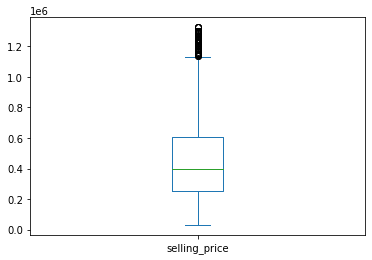

In [44]:
# Using Plot box to detect outliers
df["selling_price"].plot.box()

<AxesSubplot:>

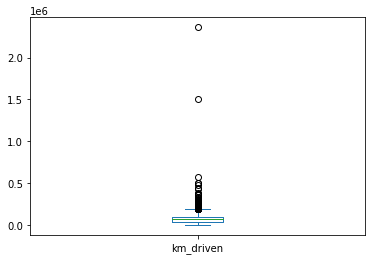

In [45]:
# Using Plot box to detect outliers
df["km_driven"].plot.box()

<AxesSubplot:>

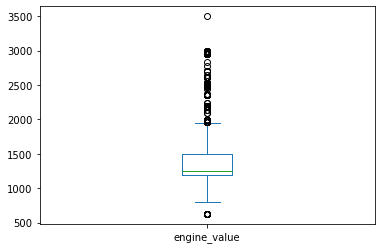

In [9]:
# Using Plot box to detect outliers
df["engine_value"].plot.box()

<AxesSubplot:>

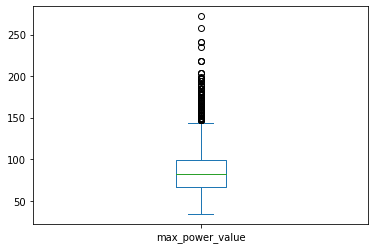

In [10]:
# Using Plot box to detect outliers
df["max_power_value"].plot.box()

<AxesSubplot:>

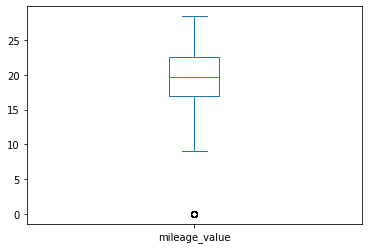

In [11]:
# Using Plot box to detect outliers
df["mileage_value"].plot.box()

### Duplicated rows

In [12]:
# looking for duplicated rows
dup_df = df[df.duplicated()]

In [13]:
# Showing the number of duplicated rows
print("Number of duplicated rows: ", dup_df.shape)

Number of duplicated rows:  (0, 12)


### Missing values

In [14]:
#looking for missing values
df.isna().sum()

name               0
year               0
selling_price      0
fuel               0
km_driven          0
seller_type        0
transmission       0
owner              0
seats              0
engine_value       0
max_power_value    0
mileage_value      0
dtype: int64

In [15]:
df.head(3)

,name,year,selling_price,fuel,km_driven,seller_type,transmission,owner,seats,engine_value,max_power_value,mileage_value
0,Maruti Alto 800 VXI,2020,250999,Petrol,30000,Individual,Manual,First Owner,5,796,47.30,22.05
1,Maruti Celerio X ZXI,2020,250000,Petrol,120000,Individual,Manual,Second Owner,5,998,67.00,21.63
2,Maruti Wagon R LXI,2020,265000,Petrol,70000,Individual,Manual,Second Owner,5,998,67.05,21.79


# EDA

### Detailing the categorical variables

<AxesSubplot:xlabel='count', ylabel='year'>

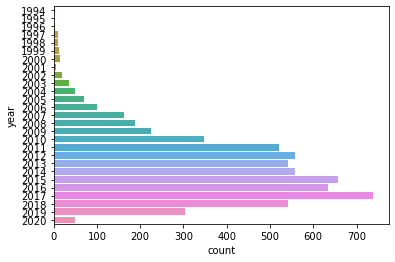

In [16]:
# Showing categorical variables
sns.countplot(y='year', data=df)

In [17]:
# Showing categorical in numbers
df["year"].value_counts()

2017    737
2015    656
2016    635
2014    558
2012    557
2013    542
2018    541
2011    521
2010    347
2019    304
2009    225
2008    188
2007    162
2006    101
2005     70
2004     49
2020     49
2003     36
2002     19
2000     14
1999     13
1998      9
1997      9
2001      6
1996      2
1994      2
1995      1
Name: year, dtype: int64

Text(0.5, 1.0, 'Distribution of the column fuel')

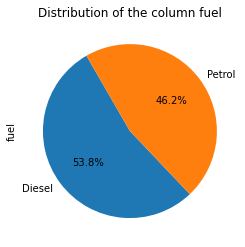

In [18]:
# Showing the percentage of Diesel and Petrol
mylabels_f = ["Diesel", "Petrol"]
pie_fuel = df["fuel"].value_counts().plot(kind='pie', 
                                          autopct="%1.1f%%", 
                                          startangle = 120, 
                                          labels = mylabels_f)
pie_fuel.set_title("Distribution of the column fuel")



In [19]:
# Showing fuel in numbers
df["fuel"].value_counts()

Diesel    3415
Petrol    2938
Name: fuel, dtype: int64

<AxesSubplot:xlabel='seller_type', ylabel='count'>

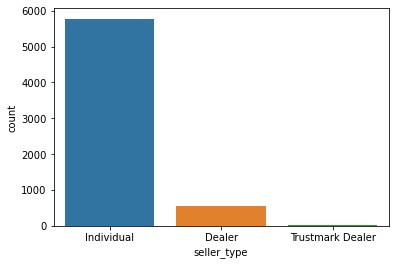

In [20]:
# Showing categorical variables
sns.countplot(x='seller_type', data=df)

In [21]:
# Showing seller_type in numbers
df["seller_type"].value_counts()

Individual          5776
Dealer               551
Trustmark Dealer      26
Name: seller_type, dtype: int64

Text(0.5, 1.0, 'Distribution of the column transmission')

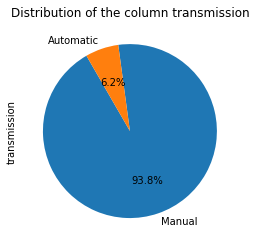

In [22]:
# Showing the percentage of Diesel and Petrol
mylabels_t = ["Manual", "Automatic"]
pie_transmission = df["transmission"].value_counts().plot(kind='pie', 
                                                          autopct="%1.1f%%", 
                                                          startangle = 120, 
                                                          labels = mylabels_t)
pie_transmission.set_title("Distribution of the column transmission")



In [23]:
# Showing trnamission in numbers
df["transmission"].value_counts()

Manual       5960
Automatic     393
Name: transmission, dtype: int64

<AxesSubplot:xlabel='count', ylabel='owner'>

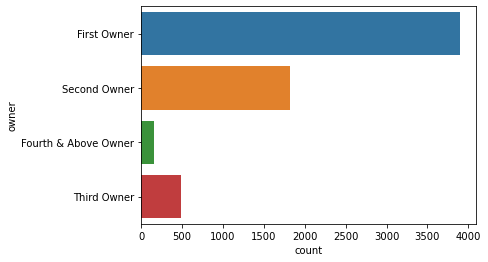

In [24]:
# Showing categorical variables
sns.countplot(y='owner', data=df)

In [25]:
# Showing owner in numbers
df["owner"].value_counts()

First Owner             3899
Second Owner            1817
Third Owner              484
Fourth & Above Owner     153
Name: owner, dtype: int64

### Detailing the numerical variables

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

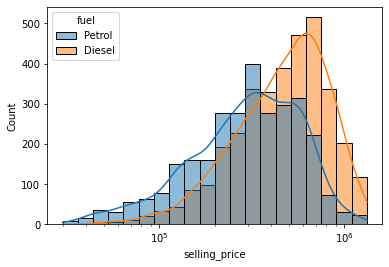

In [26]:
# Detailing the numerical variables
sns.histplot(data=df, x="selling_price", 
             kde=True, log_scale=True, 
             bins=20, hue="fuel")


<AxesSubplot:xlabel='km_driven', ylabel='Count'>

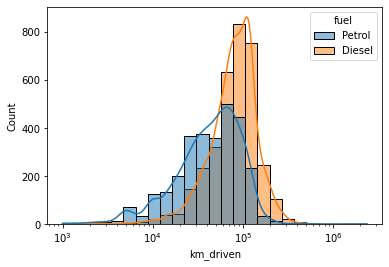

In [27]:
#Detailing the numerical variables
sns.histplot(data=df, x="km_driven", 
             kde=True, log_scale=True, 
             bins=25, hue="fuel")


<AxesSubplot:xlabel='seats', ylabel='Count'>

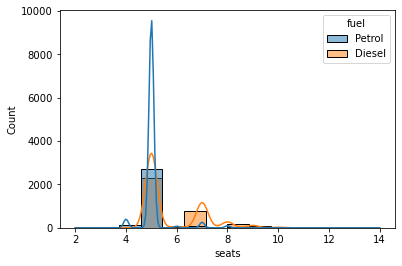

In [28]:
#Detailing the numerical variables
sns.histplot(data=df, x="seats", kde=True, hue="fuel")

<AxesSubplot:xlabel='engine_value', ylabel='Count'>

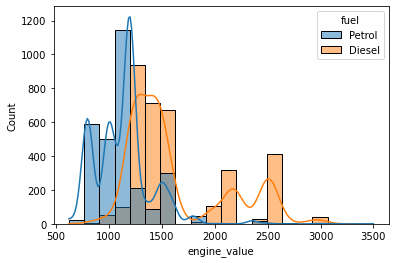

In [29]:
#Detailing the numerical variables
sns.histplot(data=df, x="engine_value", 
             kde=True, bins=20, hue="fuel")


<AxesSubplot:xlabel='max_power_value', ylabel='Count'>

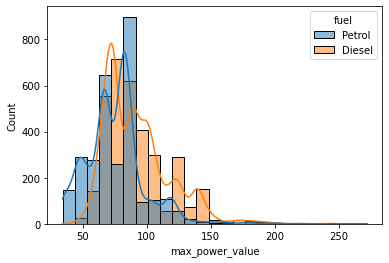

In [30]:
#Detailing the numerical variables
sns.histplot(data=df, x="max_power_value", 
             kde=True, bins=25, hue="fuel")


<AxesSubplot:xlabel='mileage_value', ylabel='Count'>

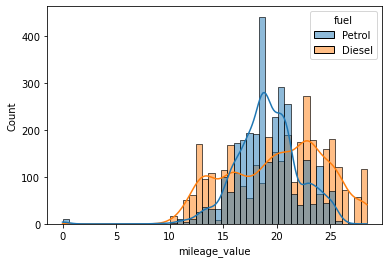

In [31]:
#Detailing the numerical variables
sns.histplot(data=df, x="mileage_value", 
             kde=True, hue="fuel")


## Encoding the categorical variables


In [32]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df, columns = ['seller_type', 'transmission', 'owner'])
df_encoded.head(3)

,name,year,selling_price,fuel,km_driven,seats,engine_value,max_power_value,mileage_value,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,Maruti Alto 800 VXI,2020,250999,Petrol,30000,5,796,47.30,22.05,0,1,0,0,1,1,0,0,0
1,Maruti Celerio X ZXI,2020,250000,Petrol,120000,5,998,67.00,21.63,0,1,0,0,1,0,0,1,0
2,Maruti Wagon R LXI,2020,265000,Petrol,70000,5,998,67.05,21.79,0,1,0,0,1,0,0,1,0


In [33]:
# importing the library
from sklearn.preprocessing import LabelEncoder

In [34]:
# creating the instance
labelencoder = LabelEncoder()
# Assingning and storing the values
df_encoded["fuel"] = labelencoder.fit_transform(df_encoded["fuel"]) # Disel = 0 // Petrol = 1
# displaying
df_encoded.head(3)

,name,year,selling_price,fuel,km_driven,seats,engine_value,max_power_value,mileage_value,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,Maruti Alto 800 VXI,2020,250999,1,30000,5,796,47.30,22.05,0,1,0,0,1,1,0,0,0
1,Maruti Celerio X ZXI,2020,250000,1,120000,5,998,67.00,21.63,0,1,0,0,1,0,0,1,0
2,Maruti Wagon R LXI,2020,265000,1,70000,5,998,67.05,21.79,0,1,0,0,1,0,0,1,0


### Dropping unnecessary columns

In [35]:
# Dropping unnecessary columns
df_encoded.drop(['seller_type_Dealer', 
                 "seller_type_Trustmark Dealer", 
                 "transmission_Automatic", 
                 "owner_Second Owner", 
                 "owner_Third Owner", 
                 "owner_Fourth & Above Owner"], 
                axis=1, inplace=True)
df_encoded.head(3)

,name,year,selling_price,fuel,km_driven,seats,engine_value,max_power_value,mileage_value,seller_type_Individual,transmission_Manual,owner_First Owner
0,Maruti Alto 800 VXI,2020,250999,1,30000,5,796,47.30,22.05,1,1,1
1,Maruti Celerio X ZXI,2020,250000,1,120000,5,998,67.00,21.63,1,1,0
2,Maruti Wagon R LXI,2020,265000,1,70000,5,998,67.05,21.79,1,1,0


### Renaming columns

In [36]:
# Renaming columns
df_encoded.rename(columns = {'seller_type_Individual':'individual_seller', 
                             'transmission_Manual':'manual', 
                             'owner_First Owner':'first_owner'}, 
                  inplace = True)
df_encoded.head(3)

,name,year,selling_price,fuel,km_driven,seats,engine_value,max_power_value,mileage_value,individual_seller,manual,first_owner
0,Maruti Alto 800 VXI,2020,250999,1,30000,5,796,47.30,22.05,1,1,1
1,Maruti Celerio X ZXI,2020,250000,1,120000,5,998,67.00,21.63,1,1,0
2,Maruti Wagon R LXI,2020,265000,1,70000,5,998,67.05,21.79,1,1,0


### Checking variables' relation

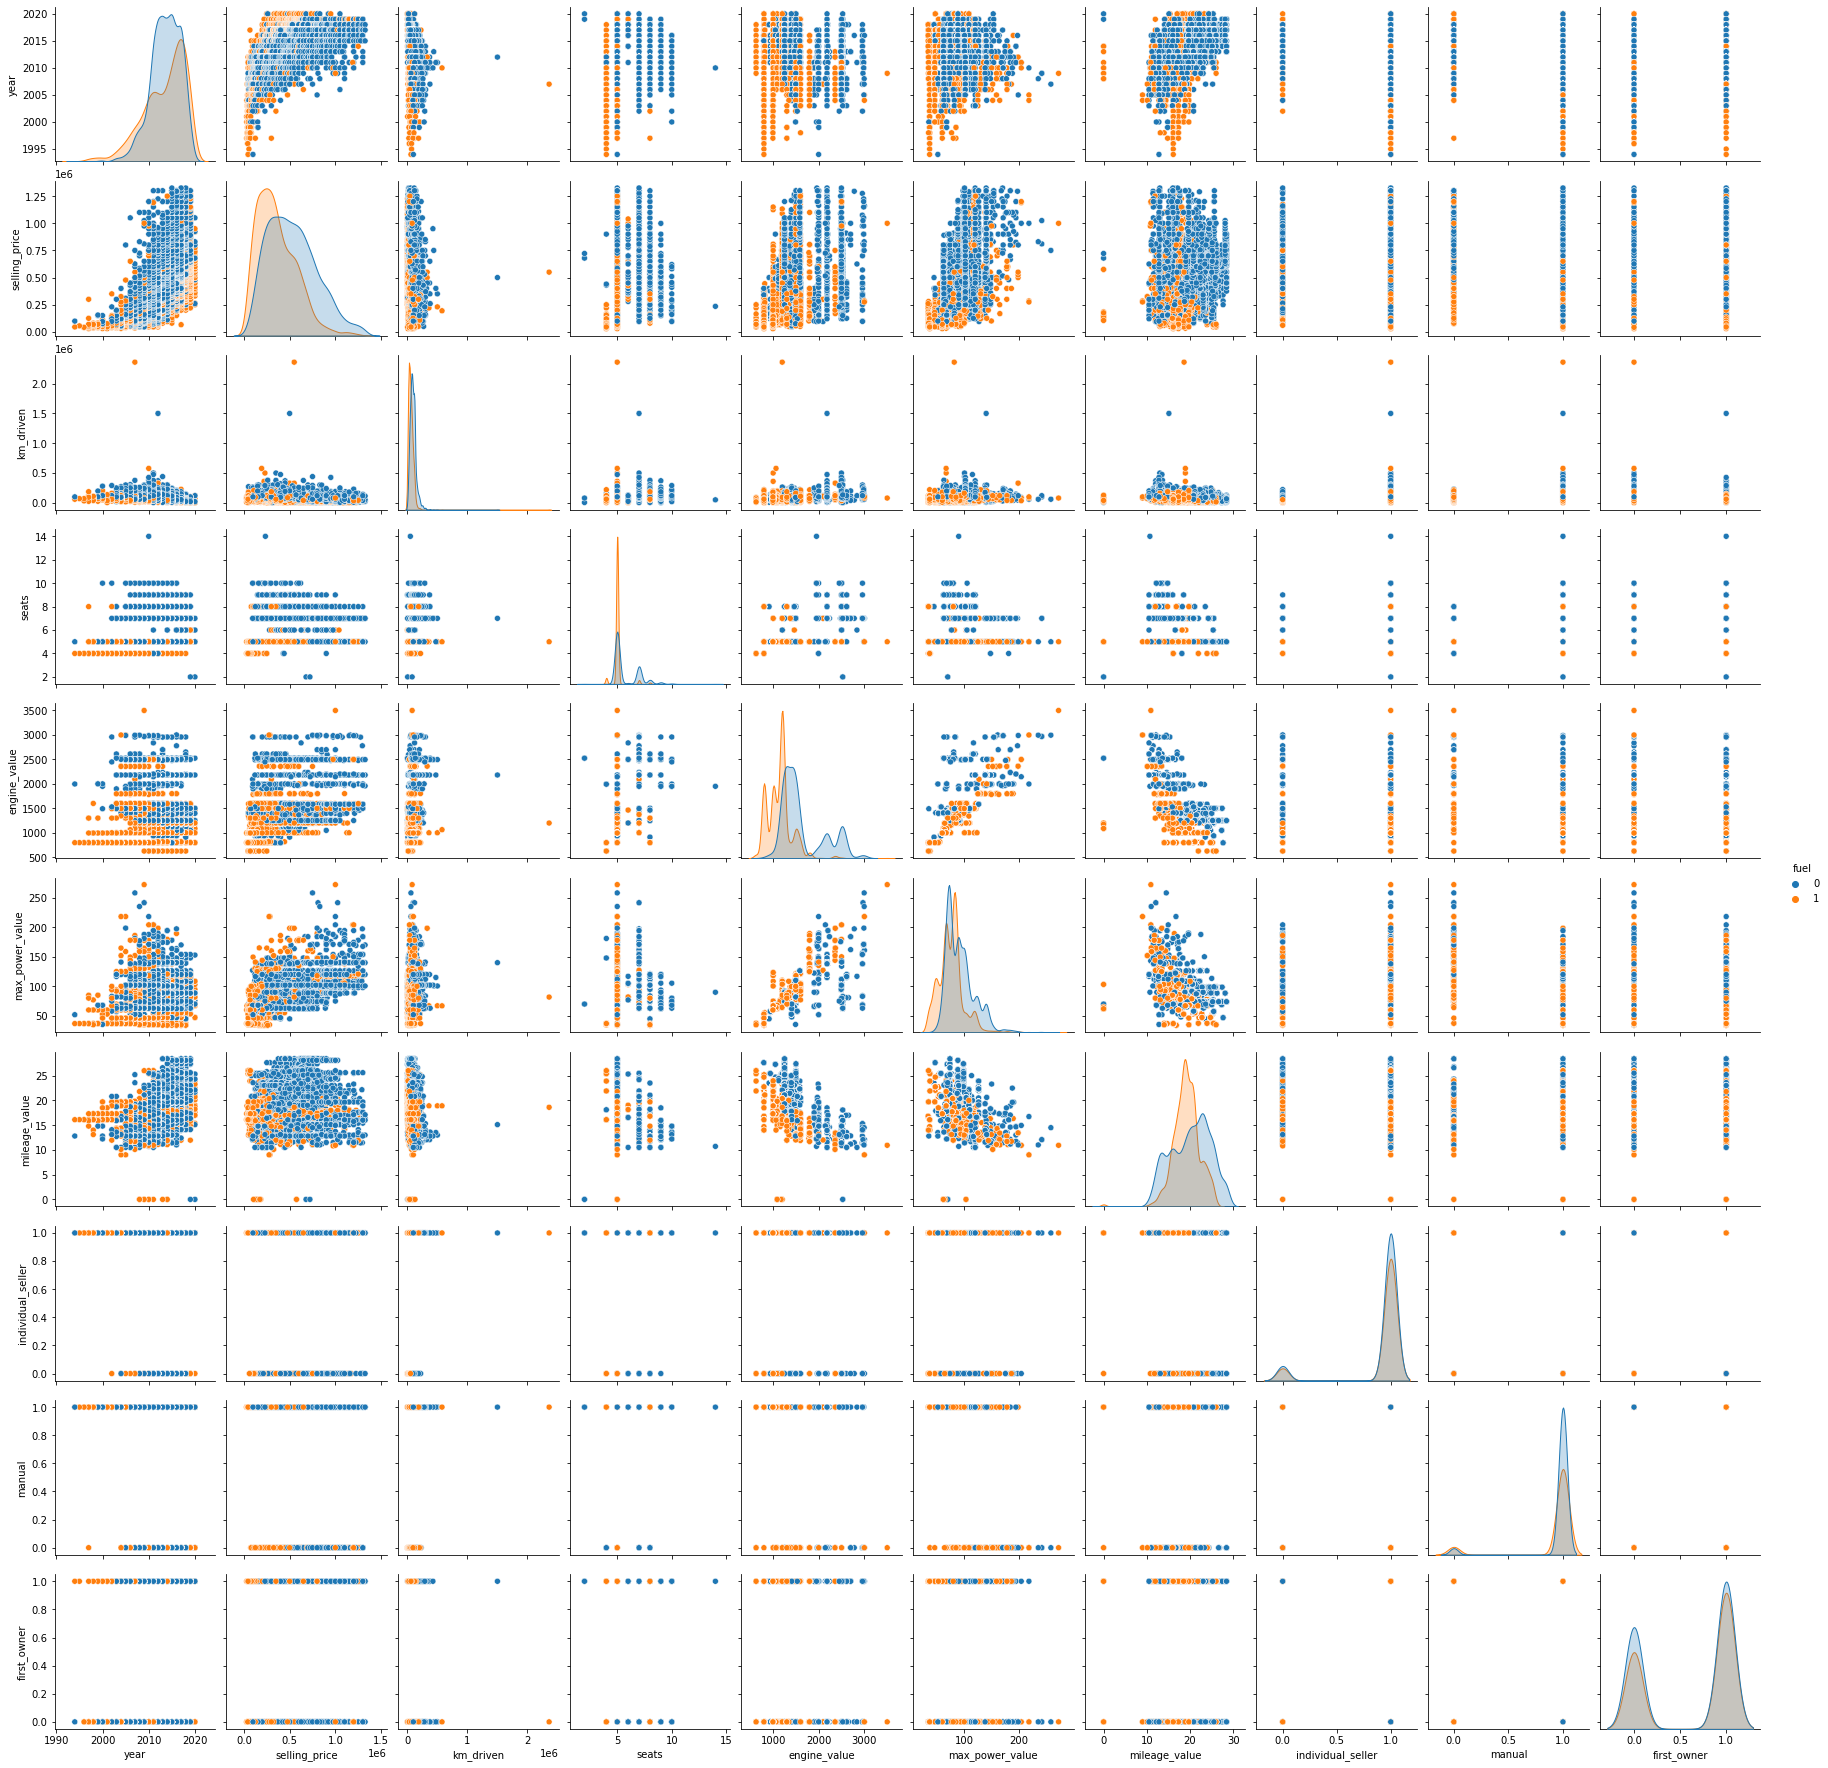

In [37]:
# # Checking variables' relation

# sns.pairplot(df_encoded, hue="fuel")

<ipython-input-48-4e7585a6721c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df_encoded.corr())
<ipython-input-48-4e7585a6721c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), cmap="Blues", vmax=1, vmin=-1, mask=mask, square=True).set(title="Variables' relation")


[Text(0.5, 1.0, "Variables' relation")]

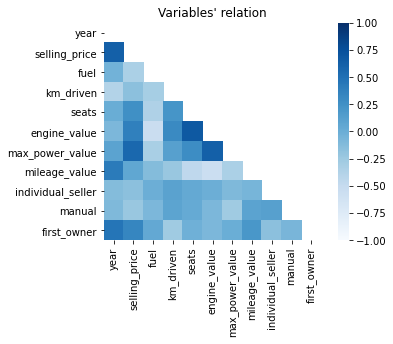

In [48]:
mask = np.zeros_like(df_encoded.corr())
mask[np.triu_indices_from(mask)] = True

# Checking variables' relation
sns.heatmap(df_encoded.corr(), cmap="Blues", vmax=1, vmin=-1, mask=mask, square=True).set(title="Variables' relation")

<ipython-input-39-e72d0b040927>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues')


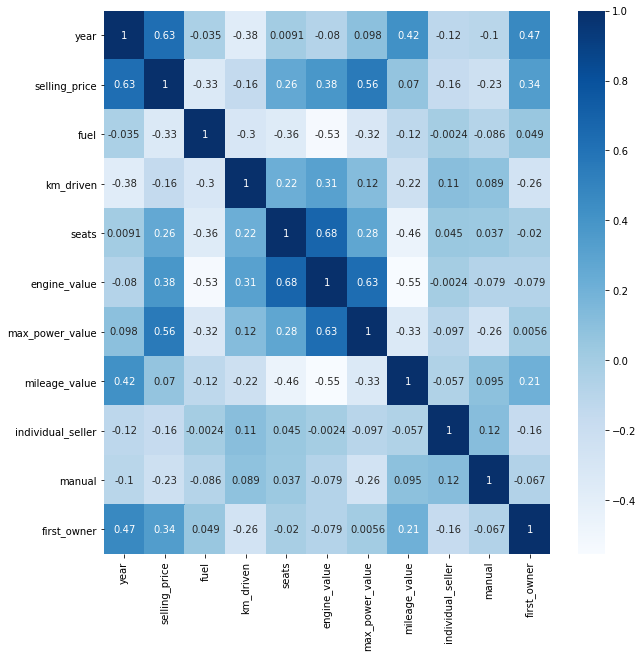

In [39]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues')

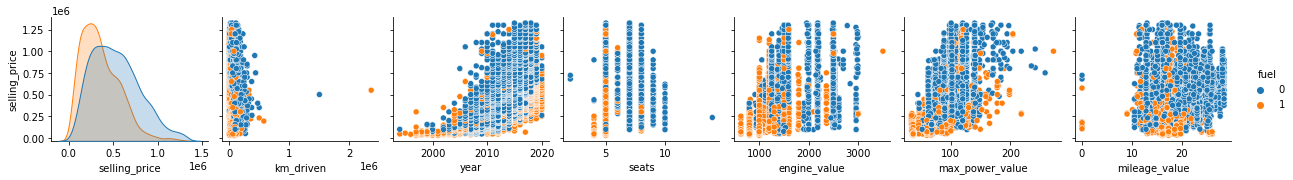

In [40]:
# Checking variables' relation

sns.pairplot(df_encoded, 
             x_vars=["selling_price", "km_driven", "year", "seats", "engine_value", "max_power_value", "mileage_value"],
             y_vars=["selling_price"],
             hue="fuel")

# Regression Models

### Preparing the dataset

In [41]:
# Making a copy
df_encoded_r = df_encoded.copy()
df_encoded_r.head(3)

,name,year,selling_price,fuel,km_driven,seats,engine_value,max_power_value,mileage_value,individual_seller,manual,first_owner
0,Maruti Alto 800 VXI,2020,250999,1,30000,5,796,47.30,22.05,1,1,1
1,Maruti Celerio X ZXI,2020,250000,1,120000,5,998,67.00,21.63,1,1,0
2,Maruti Wagon R LXI,2020,265000,1,70000,5,998,67.05,21.79,1,1,0


In [42]:
# Renaming and moving the y
df_encoded_r[['price']] = df_encoded_r['selling_price']
df_encoded_r.drop(['selling_price'], axis=1, inplace=True)
df_encoded_r.head(3)

ValueError: Columns must be same length as key

### Splititng the dataset

In [ ]:
# Splititng the dataset
from sklearn.model_selection import train_test_split
X = df_encoded_r.iloc[:, 1:-1].values
y = df_encoded_r.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression

In [ ]:
# Importing the library
from sklearn.linear_model import LinearRegression

# Training the model on the Training set
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor_LR.predict(X_test)
np.set_printoptions(precision=2) # only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))


In [ ]:
# Precision of the model
print('The precision of the model is ')
print(regressor_LR.score(X_train, y_train))

In [ ]:
# Precision using r2 score
from sklearn.metrics import r2_score

LR_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(LR_r2)



In [ ]:
# the equation
print('m = ', regressor_LR.coef_)


print('B: ', regressor_LR.intercept_)

### Random Forest Regression

In [ ]:
# Importing the library
from sklearn.ensemble import RandomForestRegressor

# Training the model on the Training set
regressor_RFR = RandomForestRegressor(max_depth=10, random_state=0)
regressor_RFR.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor_RFR.predict(X_test)
np.set_printoptions(precision=2) # only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))


In [ ]:
# Precision of the model
print('The precision of the model is ')
print(regressor_RFR.score(X_train, y_train))


In [ ]:
# Precision using r2 score
# from sklearn.metrics import r2_score

RFR_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(RFR_r2)

### Decision Tree Regression

In [ ]:
# Importing the library
from sklearn.tree import DecisionTreeRegressor

# Training the model on the Training set
regressor_DTR = DecisionTreeRegressor(max_depth=8)
regressor_DTR.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor_DTR.predict(X_test)
np.set_printoptions(precision=2) # only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))


In [ ]:
# Precision of the model
print('The precision of the model is ')
print(regressor_DTR.score(X_train, y_train))


In [ ]:
# Precision using r2 score
# from sklearn.metrics import r2_score

DTR_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(DTR_r2)

### Lasso Regression

In [ ]:
# Importing the library
from sklearn.linear_model import Lasso


# Training the model on the Training set
regressor_lasso = Lasso(alpha=1.0)
regressor_lasso.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor_lasso.predict(X_test)
np.set_printoptions(precision=2) # only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))

In [ ]:
# Precision of the model
print('The precision of the model is ')
print(regressor_lasso.score(X_train, y_train))

In [ ]:
# Precision using r2 score
# from sklearn.metrics import r2_score

lasso_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(lasso_r2)

### Ridge Regression

In [ ]:
# Importing the library
from sklearn.linear_model import Ridge

regressor_ridge = Ridge()
regressor_ridge.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor_ridge.predict(X_test)
np.set_printoptions(precision=2) # only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))

In [ ]:
# Precision of the model
print('The precision of the model is ')
print(regressor_ridge.score(X_train, y_train))

In [ ]:
# Precision using r2 score
# from sklearn.metrics import r2_score

ridge_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(ridge_r2)

### Which Regression Model performed better

### Score

In [ ]:
print("Linear Regression:         ", regressor_LR.score(X_train, y_train))
print("Random Forest Regression:  ", regressor_RFR.score(X_train, y_train))
print("Decision Tree Regressor:   ", regressor_DTR.score(X_train, y_train))
print("Lasso Regression:          ", regressor_lasso.score(X_train, y_train))
print("Ridge Regression:          ", regressor_ridge.score(X_train, y_train))

### R2 Score

In [ ]:
print("(R2 Score) Linear Regression:         ", LR_r2)
print("(R2 Score) Random Forest Regression:  ", RFR_r2)
print("(R2 Score) Decision Tree Regressor:   ", DTR_r2)
print("(R2 Score) Lasso Regression:          ", lasso_r2)
print("(R2 Score) Ridge Regression:          ", ridge_r2)

### Making Predictions

In [ ]:
df_encoded_r.head(3)

In [ ]:
# Predicting using real data

print(regressor_RFR.predict(sc.transform([[2020, 1, 30000, 5, 796, 47.30, 22.05, 1, 1, 1]])))

In [ ]:
# Making predictions
# Changing km_driven

print(regressor_RFR.predict(sc.transform([[2020, 1, 60000, 5, 796, 47.30, 22.05, 1, 1, 1]])))

In [ ]:
# Making predictions
# Changing year

print(regressor_RFR.predict(sc.transform([[2015, 1, 30000, 5, 796, 47.30, 22.05, 1, 1, 1]])))

In [ ]:
# Making predictions
# Changing engine_value

print(regressor_RFR.predict(sc.transform([[2020, 1, 30000, 5, 900, 47.30, 22.05, 1, 1, 1]])))

# Classification Models

### Preparing the dataset

In [ ]:
df_encoded.head(3)

In [ ]:
# Making a copy
df_encoded_c = df_encoded.copy()
df_encoded_c.head(3)

In [ ]:
# Renaming and moving fuel
df_encoded_c[['fuel_e']] = df_encoded_c['fuel']
df_encoded_c.drop(['fuel'], axis=1, inplace=True)
df_encoded_c.head(3)

### Spliting the dataset

In [ ]:
# Spliting the dataset
# from sklearn.model_selection import train_test_split
X1 = df_encoded_c.iloc[:, 1:-1].values
y1 = df_encoded_c.iloc[:, -1].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=0)

### Random Forest Classifier

In [ ]:
# Training the Random Forest Classifier model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_RFC = RandomForestClassifier(criterion = 'entropy', 
                                        max_depth=5, random_state = 0)
classifier_RFC.fit(X_train1, y_train1)

In [ ]:
# Predicting the Test set results
y_pred = classifier_RFC.predict(X_test1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test1.reshape(len(y_test1),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
score_RFC = accuracy_score(y_test1, y_pred)

print(cm)

In [ ]:
# Confusion Matrix Visualization
import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Random Forest Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Inserting Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [ ]:
# Precision of the model
print('The precision of the model is ')
score_RFC

### Decission Tree Classifier

In [ ]:
# Training the Decision Tree Classifier model on the Training set
from sklearn.tree import DecisionTreeClassifier

classifier_DTC = DecisionTreeClassifier(criterion="entropy", 
                                        max_depth=3)
classifier_DTC.fit(X_train1, y_train1)

In [ ]:
# Predicting the Test set results
y_pred = classifier_DTC.predict(X_test1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test1.reshape(len(y_test1),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
score_DTC = accuracy_score(y_test1, y_pred)

print(cm)

In [ ]:
# Confusion Matrix Visualization
import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Decission Tree Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Inserting Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [ ]:
# Precision of the model
print('The precision of the model is ')
score_DTC

### KNeighbors Classifier

In [ ]:
# Training the KNN model on the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier_KNC = KNeighborsClassifier(n_neighbors = 5, 
                                      metric = 'minkowski', p = 2)
classifier_KNC.fit(X_train1, y_train1)

In [ ]:
# Predicting the Test set results
y_pred = classifier_KNC.predict(X_test1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test1.reshape(len(y_test1),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
score_KNC = accuracy_score(y_test1, y_pred)

print(cm)

In [ ]:
# Confusion Matrix Visualization
import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - KNeighbors Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Inserting Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [ ]:
# Precision of the model
print('The precision of the model is ')
score_KNC

### Logistic Regression

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression

classifier_LogR = LogisticRegression(solver='liblinear', 
                                     multi_class='ovr')
classifier_LogR.fit(X_train1, y_train1)


In [ ]:
# Predicting the Test set results
y_pred = classifier_LogR.predict(X_test1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test1.reshape(len(y_test1),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
score_LogR = accuracy_score(y_test1, y_pred)

print(cm)

In [ ]:
# Confusion Matrix Visualization
import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Inserting Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [ ]:
# Precision of the model
print('The precision of the model is ')
score_LogR

### Which Classification Model performed better

In [ ]:
print("Random Forest Classifier:   ", score_RFC)
print("Decission Tree Classifier:  ", score_DTC)
print("KNeighbors Classifier:      ", score_KNC)
print("Logistic Regression:        ", score_LogR)


### Making Predictions

In [ ]:
df_encoded_c.head(3)

In [ ]:
# Predicting using real data - Random Forest Classifier

print(classifier_RFC.predict(sc.transform([[2020, 250999, 30000, 5, 796, 47.30, 22.05, 1, 1, 1]])))

In [ ]:
# Making predictions - Random Forest Classifier
# Changing engine_value, max_power_value, mileage_value

print(classifier_RFC.predict(sc.transform([[2020, 250999, 30000, 5, 1000, 28.50, 10.20, 1, 1, 1]])))

In [ ]:
# Predicting using real data - KNeighbors Classifier


print(classifier_KNC.predict(sc.transform([[2020, 480000, 44665, 6, 1198, 77.00, 25.32, 1, 1, 1]])))

In [ ]:
# Making predictions - KNeighbors Classifier
# Changing year and selling price

print(classifier_KNC.predict(sc.transform([[2015, 250000, 44665, 6, 1198, 77.00, 25.32, 1, 1, 1]])))